# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read file using pandas.

# View sample data

In [2]:
# Your code to read the dataset
df = pd.read_csv('hazelnut.csv')
# Your code to Print sample dataset
print(df)

     sample_id  length    width  thickness  surface_area     mass  \
0           71   11.67  12.8025   8.055075         34.65  1375.50   
1           72   13.86  13.0995   7.349907         38.10  1439.55   
2            1   20.53  15.5925   9.565427         49.89  1623.30   
3           73   14.13  12.2220   7.182949         35.43  1412.25   
4            2   15.85  14.7240   8.622661         43.29  1512.00   
..         ...     ...      ...        ...           ...      ...   
196        198    9.02  12.9555   7.572287         33.69  1326.15   
197        199   17.62  15.2415   8.850863         48.51  1614.90   
198         70   15.85  14.1750   8.861027         41.82  1487.85   
199        200   21.83  17.5590   9.828308         57.39  1712.55   
200        201   21.13  17.5140   9.837132         58.38  1732.50   

     compactness  hardness  shell_top_radius  water_content  \
0        0.93005    19.145            4.4604       0.048668   
1        0.93401     8.780            4.7844 

# Print the shape of the pandas dataframe

In [3]:
# Print the shape of the dataframe
print(df.shape)

(201, 12)


# Separate the dataframe into input matrix X and output vector y

In [4]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

# Import the SKlearn methods

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


# Split the data into train and test sets - X_train, X_test, y_train, y_test.

# Use test size of 40%.

## Hint: Use Sklearn function: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# Your code to separate train and test sixe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)


# Your code to Print the shapes of the X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 11)
(81, 11)
(120,)
(81,)


# Scale the dataset between 0-1.

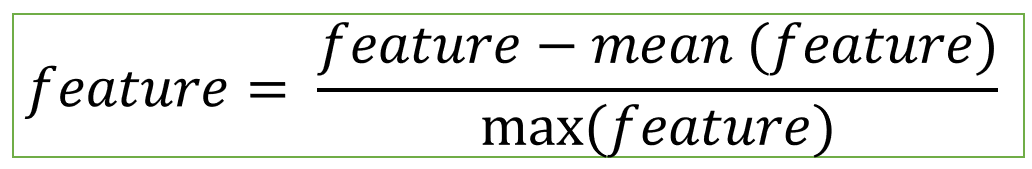

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implement Knn classifer using sklearn.

# Use number of neigbours as 3.

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the test sample X_test.

# Print predicted values.

# Print actual test values.

# Are predicted and actual values are equal?

In [9]:
y_pred = knn.predict(X_test)
print (y_pred)
print (y_test)

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c

# Print accuracy for training and test set.

In [10]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9833333333333333
0.9506172839506173


# Print Classification report - Precision, Recall, and F-score.

In [11]:
print (classification_report(y_test, y_pred))

print (print("Validation Accuracy: ", accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

 c_americana       0.90      1.00      0.95        27
  c_avellana       0.96      0.93      0.94        27
   c_cornuta       1.00      0.93      0.96        27

    accuracy                           0.95        81
   macro avg       0.95      0.95      0.95        81
weighted avg       0.95      0.95      0.95        81

Validation Accuracy:  0.9506172839506173
None


# Display Confusion Matrix

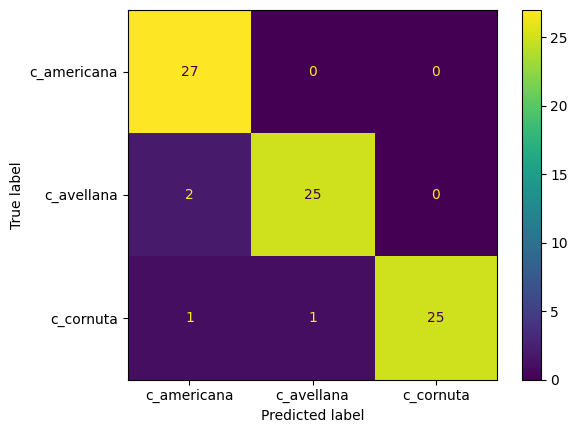

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn.classes_)
disp.plot()
plt.show()

# Till now, we implemented the KNN for number of neigbours 3.
# Now, we will check the accuracy for number of neighbours 1- 10 - all values, and will plot accuracy.

In [13]:
train_scores = []
test_scores = []

# neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for neighbour in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors= neighbour)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the accuracy for number of neigbours 1-10.

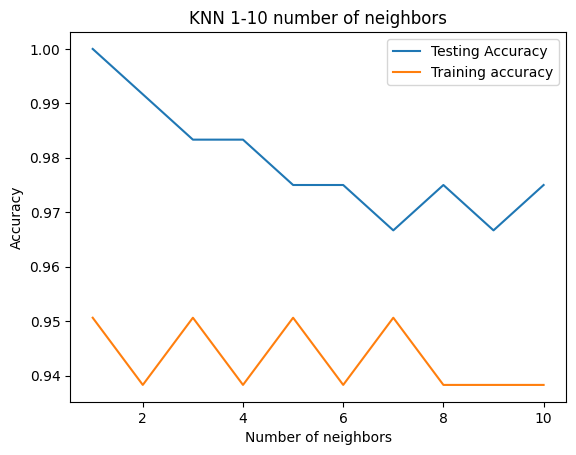

In [18]:
#
# Your code to plot neigbours vs train scores. Proivide label name as the 'train accuracy'
# Your code to plot neigbours vs test scores. Provide label bame as the 'test accuracy'.
#
plt.title('KNN 1-10 number of neighbors')    

plt.plot([1,2,3,4,5,6,7,8,9,10], train_scores, label='Testing Accuracy')
plt.plot([1,2,3,4,5,6,7,8,9,10], test_scores, label='Training accuracy')

plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plt.show()

# Let's implement other ML algorithm that we studied -  Logistic Regression and MLP.

# We will do the same task using Logistic Regression and MLP.

## Implement Logistic Regression and MLP for the same problem and compare accuracy of the three classifiers using Bar plot:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


In [22]:
#
# Your code to implement Logistic regression and MLP based classifier.
# You could split this code into multiple cells
#

from sklearn.linear_model import LogisticRegression

test_scores_models =[]
test_scores_models.append(test_scores[4])

logisticRegression =  LogisticRegression(random_state = 0)

logisticRegression.fit(X_train, y_train)

y_pred = logisticRegression.predict(X_test)

print (y_pred)

print (logisticRegression.score(X_train, y_train))
print (logisticRegression.score(X_test, y_test))

test_scores_models.append(logisticRegression.score(X_test, y_test))

print (classification_report(y_test, y_pred))
print("Validation Accuracy: ",accuracy_score(y_test, y_pred))

['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_americana' 'c_avellana'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta' 'c_americana'
 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana' 'c_americana'
 'c_americana' 'c_cornuta' 'c_americana' 'c_avellana' 'c_avellana'
 'c_avellana' 'c_americana' 'c_avellana' 'c_avellana' 'c_avellana'
 'c_c

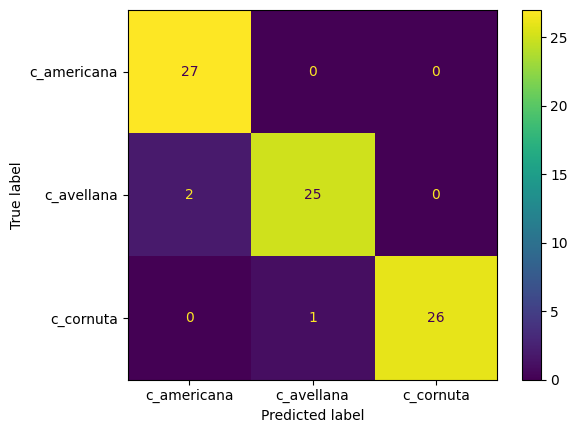

In [23]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegression.classes_)
disp.plot()
plt.show()

In [24]:
from sklearn.neural_network import MLPClassifier

MLP =  MLPClassifier(random_state=1, max_iter=500, verbose=True)

MLP.fit(X_train, y_train)

Iteration 1, loss = 1.02496270
Iteration 2, loss = 0.98838596
Iteration 3, loss = 0.95316579
Iteration 4, loss = 0.91924717
Iteration 5, loss = 0.88664037
Iteration 6, loss = 0.85534785
Iteration 7, loss = 0.82533153
Iteration 8, loss = 0.79661407
Iteration 9, loss = 0.76913360
Iteration 10, loss = 0.74288071
Iteration 11, loss = 0.71775963
Iteration 12, loss = 0.69373720
Iteration 13, loss = 0.67082569
Iteration 14, loss = 0.64897192
Iteration 15, loss = 0.62812188
Iteration 16, loss = 0.60822535
Iteration 17, loss = 0.58920453
Iteration 18, loss = 0.57103641
Iteration 19, loss = 0.55368991
Iteration 20, loss = 0.53710653
Iteration 21, loss = 0.52126236
Iteration 22, loss = 0.50611304
Iteration 23, loss = 0.49163089
Iteration 24, loss = 0.47777981
Iteration 25, loss = 0.46453777
Iteration 26, loss = 0.45187351
Iteration 27, loss = 0.43975229
Iteration 28, loss = 0.42813956
Iteration 29, loss = 0.41701735
Iteration 30, loss = 0.40636502
Iteration 31, loss = 0.39614097
Iteration 32, los

MLPClassifier(max_iter=500, random_state=1, verbose=True)

In [27]:
y_pred_prob = MLP.predict_proba(X_test)

print (y_pred_prob[:6])


y_pred = MLP.predict(X_test)

print (y_pred)

print (MLP.score(X_train, y_train))
print (MLP.score(X_test, y_test))
test_scores_models.append(MLP.score(X_test, y_test))

print (classification_report(y_test, y_pred))

print("Validation Accuracy: ",accuracy_score(y_test, y_pred))

[[1.78275155e-04 9.99573144e-01 2.48580806e-04]
 [9.87096244e-01 1.27452759e-02 1.58480180e-04]
 [5.48456531e-01 4.51292636e-01 2.50832593e-04]
 [1.77311322e-06 9.99251243e-01 7.46984050e-04]
 [5.98441676e-04 2.87628678e-03 9.96525272e-01]
 [1.63728059e-05 9.99765007e-01 2.18620068e-04]]
['c_avellana' 'c_americana' 'c_americana' 'c_avellana' 'c_cornuta'
 'c_avellana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana'
 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_avellana' 'c_americana'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_americana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_cornuta' 'c_avellana' 'c_americana' 'c_americana' 'c_avellana'
 'c_americana' 'c_avellana' 'c_cornuta' 'c_americana' 'c_cornuta'
 'c_americana' 'c_americana' 'c_avellana' 'c_americana' 'c_cornuta'
 'c_avellana' 'c_avellana' 'c_cornuta' 'c_cornuta' 'c_cornuta'
 'c_americana' 'c_cornuta' 'c_cornuta' 'c_america

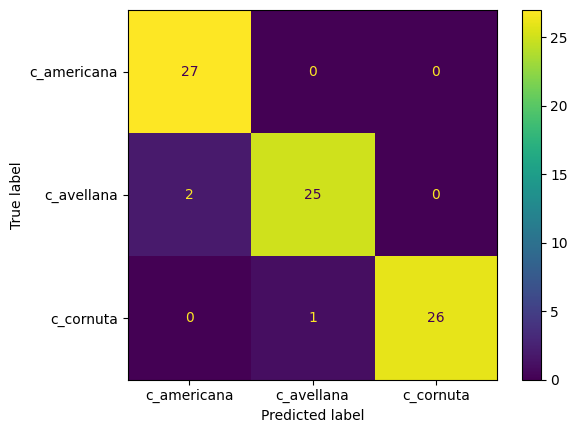

In [28]:
cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegression.classes_)
disp.plot()
plt.show()

In [29]:
test_scores_models

[0.9506172839506173, 0.9629629629629629, 0.9629629629629629]

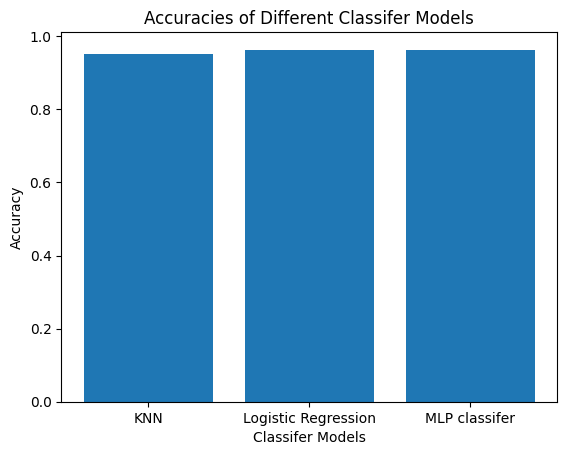

In [30]:
models=['KNN', 'Logistic Regression' , 'MLP classifer']
 
plt.bar(models, test_scores_models)

plt.xlabel('Сlassifer Models')
plt.ylabel('Accuracy')

plt.title('Accuracies of Different Сlassifer Models')
plt.show()

# **Important** -  Lab logbook requirement:
# Put bar plot comparing the accracy of three models in you lablogbook.